# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [ ]:
!pip install spacy==2.2.3

In [2]:
import spacy
spacy.__version__

'2.2.3'

In [ ]:
!python3 -m spacy download pt

In [4]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Etapa 2: Carregamento da base de dados

In [7]:
# "encoding = 'utf-8'" para carregar a base de dados da lingua portuguesa
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding = 'utf-8')

In [8]:
base_dados.shape

(196, 2)

In [9]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [10]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


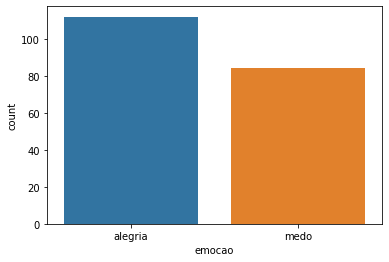

In [11]:
sns.countplot(base_dados['emocao'], label = 'Contagem');

# Etapa 3: Função para pré-processamento dos textos

In [12]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [14]:
print(stop_words)

{'foram', 'estivestes', 'meus', 'pode', 'partir', 'vem', 'tiveram', 'naquela', 'os', 'boa', 'sob', 'comprido', 'cedo', 'mais', 'próprio', 'estiveste', 'daquela', 'cima', 'breve', 'ele', 'pelo', 'usar', 'tanta', 'numa', 'menor', 'apoia', 'grupo', 'relação', 'nove', 'todos', 'porquanto', 'debaixo', 'que', 'duas', 'quanto', 'eu', 'estas', 'ainda', 'pôde', 'puderam', 'te', 'estão', 'tempo', 'ligado', 'nenhuma', 'isto', 'onde', 'tenho', 'fui', 'for', 'dão', 'é', 'naquele', 'ver', 'da', 'estás', 'fostes', 'desta', 'estado', 'vens', 'estava', 'sexto', 'inclusive', 'seus', 'maior', 'cinco', 'iniciar', 'atrás', 'onze', 'tipo', 'sou', 'conhecida', 'pela', 'contra', 'eventual', 'final', 'sétima', 'momento', 'ir', 'me', 'certeza', 'dos', 'dezassete', 'dezoito', 'pois', 'mesmo', 'tivestes', 'ademais', 'vão', 'ontem', 'qual', 'fará', 'foste', 'quê', 'geral', 'outra', 'bastante', 'ao', 'teu', 'vez', 'dar', 'enquanto', 'novo', 'lugar', 'apoio', 'favor', 'devem', 'nunca', 'aí', 'vêm', 'sobre', 'estou',

In [15]:
len(stop_words)

413

In [16]:
pln = spacy.load('pt')

In [17]:
pln

In [18]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)
  
  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [20]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural cursar curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [21]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [22]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [23]:
base_dados.head(10)

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


### Tratamento da classe

In [24]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [25]:
type(exemplo_base_dados)

list

In [26]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [27]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [28]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [29]:
type(exemplo_base_dados[0][1])

dict

In [30]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [31]:
len(base_dados_final)

196

In [32]:
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [33]:
base_dados_final[0][0]

'trabalhar agradável'

In [34]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [35]:
type(base_dados_final[0][1])

dict

In [36]:
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

# Etapa 5: Criação do classificador

In [37]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
modelo.add_pipe(categorias)
historico = []

In [39]:
modelo.begin_training()
for epoca in range(500):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 3.6618131582510927e-09}
{'textcat': 3.8721882367198646e-09}
{'textcat': 2.2837431112865403e-09}
{'textcat': 2.9627306580293222e-09}
{'textcat': 1.4625370775567248e-09}


In [40]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [41]:
historico_loss = np.array(historico_loss)
historico_loss

array([6.67036703e-03, 8.57559432e-08, 2.71300362e-08, 1.44607177e-08,
       5.72041725e-09, 4.72005554e-09, 3.70650044e-09, 3.06949345e-09,
       3.66181316e-09, 3.87218824e-09, 2.28374311e-09, 2.96273066e-09,
       1.46253708e-09])

Text(0, 0.5, 'Erro')

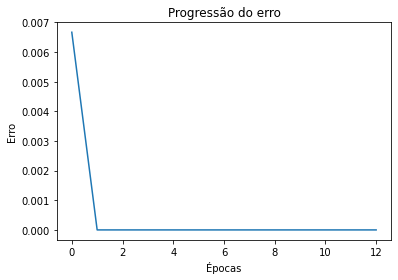

In [42]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [43]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [44]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [45]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [46]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor olho'

In [47]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor olho

In [48]:
previsao.cats

{'ALEGRIA': 0.9988633394241333, 'MEDO': 4.539786823443137e-05}

In [49]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 0.010176178999245167, 'MEDO': 0.9992675185203552}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [50]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [51]:
previsoes

[{'ALEGRIA': 0.9997736811637878, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9996122717857361, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9995260238647461, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9997778534889221, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9993883371353149, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9996179342269897, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9996877908706665, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9998252987861633, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9998427629470825, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9998708963394165, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9995712637901306, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9995500445

In [52]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [53]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [54]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [56]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Avaliação na base de teste

In [57]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')

In [58]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [59]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [60]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [61]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [62]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [63]:
respostas_reais = base_dados_teste['emocao'].values

In [64]:
accuracy_score(respostas_reais, previsoes_final)

0.5833333333333334

In [66]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[31, 17],
       [18, 18]])